In [1]:
# create feature pickles to use around the place
# humpback whale pickle with new annots
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/tests/synthetic_tests', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [4]:
def normalize_matrix(matrix):
    matrix += 1e-40
    return matrix / np.sum(matrix, axis=(matrix.ndim - 1), keepdims=True)

from sklearn.utils import check_random_state
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [9]:
np.random.randn(1)

array([0.2987324])

In [112]:

rs = check_random_state(546)

# Set random seed for reproducibility
np.random.seed(20)

# Number of states (clusters)
n_states = 20  # Increase the number of clusters
n_features = 2

# Create a GaussianHMM model
model = GaussianHMM(n_components=n_states, covariance_type="full")

model.n_features = n_features

# Set transition probabilities
transition_probabilities = np.random.dirichlet(np.ones(n_states), size=n_states) + (np.eye(n_states) * 2)
model.transmat_ = normalize_matrix(transition_probabilities)

# Set initial state probabilities
initial_state_probabilities = np.random.dirichlet(np.ones(n_states))
model.startprob_ = initial_state_probabilities

# Set means and covariances for each state
means = []
for st in range(n_states):
    m = np.zeros(n_features)
    for i in range(n_features):
        m[i] = np.random.uniform(-1,1)
    means.append(m)

model.means_ = np.stack(means)
model.covars_ = np.tile(np.identity(n_features), (n_states, 1, 1))

for i in range(n_states):
    # Introduce more variability in covariances
    # covs = np.zeros(n_features)
    # for fea in range(n_features):
    #     covs[fea] = np.random.uniform(0.02, 0.05)
    model.covars_[i] = np.diag(np.ones(n_features) * np.random.uniform(0.002, 0.02))

# Generate sequences of observations
X = []
Z = []
n_samples = 500
n_seqs = 30
for i in range(n_seqs):
    x, z = model.sample(n_samples)
    X.append(x)
    Z.append(z)
# X, Z = model.sample(n_samples)
# X_test, Z_test = model.sample(n_samples)
# Plot the simulated data


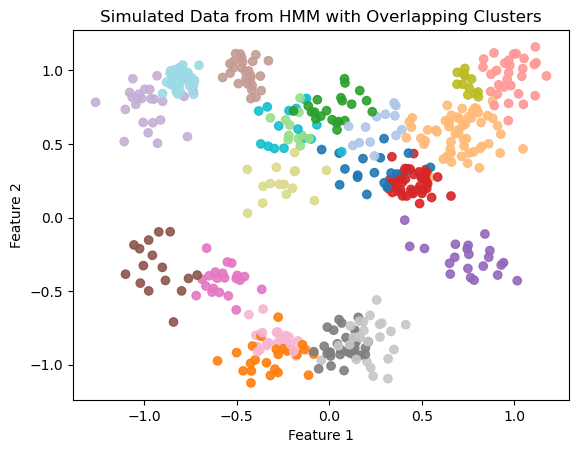

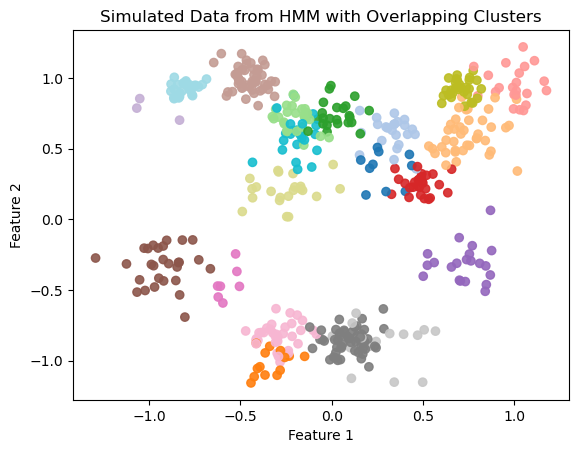

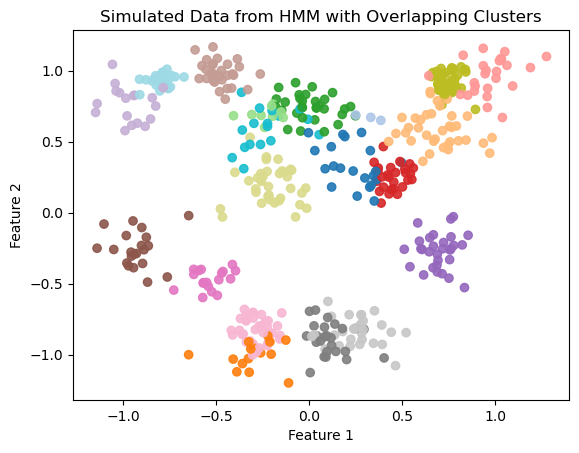

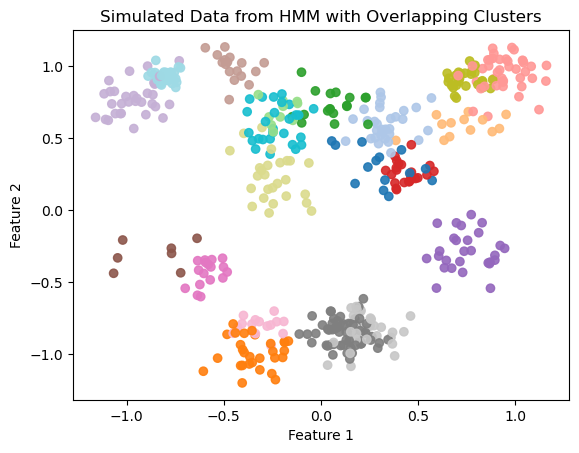

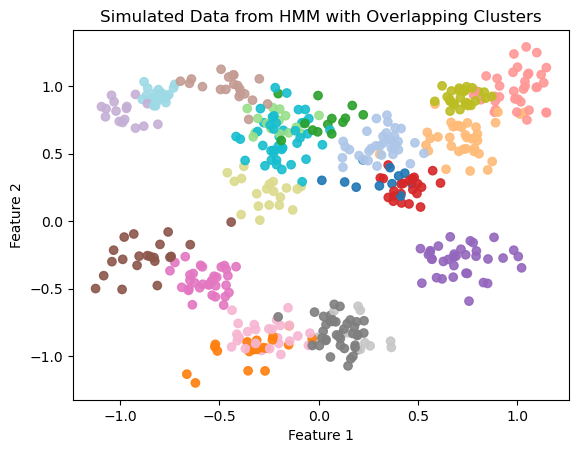

In [113]:
for i in range(5):
    x = X[i]
    z = Z[i]
    plt.scatter(x[:, 0], x[ :, 1], c=z, cmap='tab20', alpha=0.9)
    plt.title('Simulated Data from HMM with Overlapping Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [114]:
# separate using cross-validation
import final.cross_validation as cv
from final.cross_validation import *
import importlib
importlib.reload(cv)
n_folds = 2
cv_output = cv.split_data_for_cross_validation(X, Z, n_folds, test_ratio=0.2)

In [115]:
import pickle
# Pickle for reading in Python
output = open('unstructured_hmm_data_20_samples' + ".pkl", "wb")
pickle.dump(cv_output, output)
output.close()